##### Simple Monto Carlo 
General idea: Graw independent samples from distribution to approximate expectation.
$$E[f] = \int f(z)p(z)\,dz \approx \frac{1}{N}\sum_{n=1}^Nf(Z^n)\quad Z^n\sim p(z)$$

Even though, we give each observations with same weight $\frac{1}{N}$, the probability of each observation's occurrance is dependent on the underline probability distribution implicitly.

##### Predictive distribution

$$
\begin{aligned}
P(x^*|D)  &= \int p(x^*|\theta,D)P(\theta|D)\,d\theta \\
& \approx \frac{1}{N}\sum_{n=1}^Np(x^*|\theta^n)\quad \theta^n \sim p(\theta|D)
\end{aligned}$$

##### Directed Graphical Models

For many distribution, the joint distribution can be convenniently specified in terms of a graphical model.

$$$$

###### Basic Sampling Algorithm

$Y\sim F$, $z\sim U[0,1]$, $Y  = F^{-1}(Z)$

Problem: Compute $h(y)$ is just as hard !

In [1]:
import numpy as np
import scipy 
import sklearn 
import matplotlib.pyplot as plt 
import random 


$p(y) = \lambda \exp(-\lambda y)$

$h(y)=  \int^y p(y)\,dy = 1- \exp(-\lambda y)$

In [2]:
import scipy.stats
import matplotlib.pyplot as plt

alpha = 1.
nsamp = 1000

u = np.random.uniform(0,1,nsamp)
xhat = -1.0 / alpha * np.log(1 - u)

fig,ax = plt.subplots()

# exponential distrib samples by inverse method
ax.hist(xhat,normed=1,bins=30,alpha=0.3,label='inverse method') 
# exponential distrib samples by scipy.stats
xrvs = x.rvs(nsamp)
xe = np.linspace(0,xrvs.max(),100)
ax.hist(xrvs,bins=30,normed=1,alpha=0.3,label='scipy.stats')
# exponential theoretical density function
ax.plot(xe,x.pdf(xe),'r-',label='theoretical')

ax.set_xticks(range(int(xrvs.max())))

ax.axis(ymax=1.05)
ax.set_title('Inverse CDF for Exponential Distribution')
ax.set_ylabel('pdf(x)',fontsize=18)
ax.set_xlabel('x',fontsize=18)
ax.legend();
plt.show()

NameError: name 'x' is not defined

##### Rejection Sampling

Sampling from the target distribution $p(z)= \tilde{p}(z)/Z_p$ is difficult. Suppse we have an easy-to-sample proposal distribution $q(z)$

- sample: $z\sim q(z)$

- Sample: $u\sim U[0,kq(z)]$

- If $u>\tilde{p}(z)$. the sample is reject.

$$\begin{aligned}
P(accept) & = \int \frac{\tilde{p}(z)}{ kq(z)}q(z)\,dz \\
       & = \frac{1}{k}\int \tilde{p}(z)\,dz
\end{aligned}$$
The fraction of accepted samples depends on the ratio of the area.

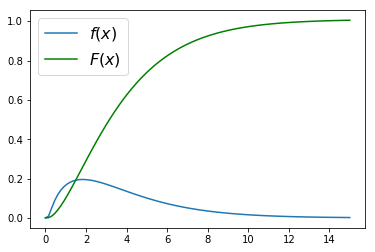

In [4]:
x = np.linspace(0.001,15,100)
fig,ax=plt.subplots()

fx = np.exp(-(x-1)**2/2./x)*(x+1)/12
ax.plot(x,fx,label='$f(x)$')
ax.plot(x,np.cumsum(fx)* np.diff(x)[0],'g',label='$F(x)$')
ax.legend(loc=0,fontsize=16);
plt.show()

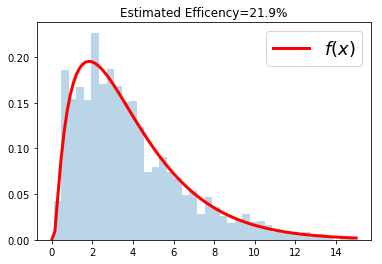

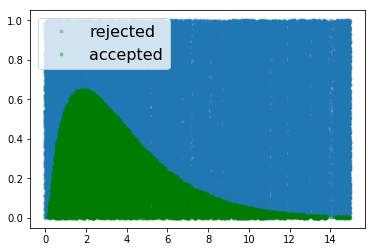

In [5]:

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    y = []
    for i in range(len(x)):
        y.append(np.exp(-(x[i]-1)**2/2./x[i])*(x[i]+1)/12)
    return y
   
num = 1000; rep = 100
M = .3 # scale factor
u1 = np.repeat(np.random.uniform(0,15,num),rep) # uniform random samples scaled out
u2 = np.random.uniform(0,1,num*rep)
idx = np.where(u2 <= (np.array(f(u1))/ M))
v = u1[idx]

fig,ax = plt.subplots()
ax.hist(v,normed=1,bins=40,alpha=.3)
ax.plot(x,fx,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(len(v)*100/len(u1)))
ax.legend(fontsize=18)
plt.show()

fig,ax = plt.subplots()
ax.plot(u1,u2,'.',label='rejected',alpha=.3)
ax.plot(u1[idx],u2[idx],'g.',label='accepted',alpha=.3)
ax.legend(fontsize=16)
plt.show()

##### Important Sampling ( Expection)

$
\begin{aligned}
E[f] & = \int f(z)p(z)\,dz \\
& = \int f(z)\frac{p(z)}{q(z)}q(z)\,dz \\
& \approx \frac{1}{N}\sum_n \frac{p(z^n)}{q(z^n)}f(z^n)
\end{aligned}$

But wait, we can not compute $p(z)$

$\begin{aligned}E[f] &= \int f(z)p(z)\,dz = \int f(z)\frac{p(z)}{q(z)}q(z)\,dz \\
& = \frac{Z_q}{Z_p}\int f(z)\frac{\tilde{p}(z)}{\tilde{q}(z)}q(z)\,dz   \approx \frac{Z_q}{Z_p}\frac{1}{N}\sum_n \frac{\tilde{p}(z^n)}{\tilde{q}(z^n)}f(z^n) \\
& = \frac{Z_q}{Z_p}\frac{1}{N}\sum_n w^nf(z^n)
\end{aligned}$

But we can use the same weights to approximate $Z_q/Z_p$. 

$
\begin{aligned}
Z_q/Z_p & = \frac{1}{Z_q}\int \tilde{p}(z)\,dz  = \int \frac{\tilde{p}(z)}{\tilde{q}_z}q(z)\,dz  \\
& = \frac{1}{N}\sum_n \frac{\tilde{p}(z^n)}{\tilde{q}(z^n)} = \frac{1}{N}\sum_n w^n
\end{aligned}
$

Hence  $E[f]\approx \sum_{n=1}^N \frac{w^n}{\sum_{n}w^n}f(z^n), \quad z^n \sim q(z)$.

$h(x) = 10\exp(-2|x-5|)$, suppose that we want to calculate $E[h(X)]$, where $X\sim U[0,10]$. That is we want to calculate the integral 
$$\int_0^{1} \exp(-2|x-5|)\,dx$$

The function h in this case is peaked at 5, and decays quickly elsewhere, therefore, under
the uniform distribution, many of the points are contributing very little to this expectation.
Something more like a gaussian function ($ce^{-x^2}
$
) with a peak at 5 and small variance,
say, 1, would provide greater precision. We can re-write the integral as
$$\int_0^{10} 10 \exp(-2|x-5|)\frac{1/10}{\frac{1}{\sqrt{2\pi}}\exp\{-(x-5)^2/2\}}\frac{1}{\sqrt{2\pi}}\exp\{-(x-5)^2/2\}\,dx$$



In [62]:
x = np.random.uniform(0,10,100000)
y = 10 * np.exp(-2*np.abs(x-5))
print(np.mean(y))

def weight(x):
    return (1.0/ 10) / (1.0/np.sqrt(2* np.pi) * np.exp( - (x -5)**2 / 2))
def f(x) :
    return 10 * np.exp(-2 * abs(x-5))

X = np.random.normal(5,1, 100000)
Y = 0
for i in range(len(X)):
    Y += weight(X[i]) * f(X[i])
print(np.mean(Y)/ 100000)
  

1.00141028439
1.00019922094


3.141592653589793


- If our proposal distribution $q(z)$ poorly matches our target distribution $p(z)$ then:

  - Rejection sampling: almost always rejects

  - Importance Sampling: has large, possibly infinite, variance (unreliable estimator)

- For high-dimensional problems. finding good proposal distribution is very hard

- Markov Chain Monte Carlo
